<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/L_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.8MB 44.9MB/s 
     |████████████████████████████████| 450kB 49.7MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.


'2.1.0'

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Can be used to create a validation set from the training data
from sklearn.preprocessing import StandardScaler # Can be used to standardize the inputs
import matplotlib.pyplot as plt

In [0]:
data = load_breast_cancer() # data is of type bunch, the values in the bunch however are all ndarrays
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33) # returns a 4 element tuple
N, D = x_train.shape # Shape is an attribute
scaler = StandardScaler() # Scaler object must be instantiated
x_train = scaler.fit_transform(x_train) # Fit generates mu/mean and sigma/stdev, transform warps the dataset
x_test = scaler.transform(x_test) # Using the same paremeters generated by fit_transform we transform the test set 

In [4]:
model = tf.keras.models.Sequential( # Sequentially activate the list of keras layer functopns
    [tf.keras.layers.Input(shape=(D,)), # Passes the shape of the input vector to Keras
     tf.keras.layers.Dense(1, activation='sigmoid') # Dense computes the activation function for the model, the output size and the activation function to be used are the required arguments
     ])
model.compile(optimizer='adam', # The gradient descent optimizer function, adam is the general use case function
                  loss='binary_crossentropy', # There are two labels in the data set so we must use binary cross entropy for the loss function
                  metrics=['accuracy']) # Tells the model what metrics to keep track of while training takes place
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100) # trains the model, saves the history to r

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 977us/sample - loss: 0.6896 - accuracy: 0.6010 - val_loss: 0.6749 - val_accuracy: 0.6330
Epoch 2/100
381/381 [==============================] - 0s 89us/sample - loss: 0.6203 - accuracy: 0.6562 - val_loss: 0.6202 - val_accuracy: 0.6649
Epoch 3/100
381/381 [==============================] - 0s 87us/sample - loss: 0.5603 - accuracy: 0.7270 - val_loss: 0.5729 - val_accuracy: 0.7074
Epoch 4/100
381/381 [==============================] - 0s 84us/sample - loss: 0.5110 - accuracy: 0.7848 - val_loss: 0.5317 - val_accuracy: 0.7394
Epoch 5/100
381/381 [==============================] - 0s 89us/sample - loss: 0.4678 - accuracy: 0.8189 - val_loss: 0.4973 - val_accuracy: 0.7660
Epoch 6/100
381/381 [==============================] - 0s 80us/sample - loss: 0.4322 - accuracy: 0.8373 - val_loss: 0.4677 - val_accuracy: 0.7660
Epoch 7/100
381/381 [==============================] - 0s 89us/sample - loss:

In [5]:
print('Train Score:', model.evaluate(x_train, y_train)) # Shows the training score
print('Test Score:', model.evaluate(x_test,y_test)) # Shows the test score

381/381 [==============================] - 0s 45us/sample - loss: 0.0825 - accuracy: 0.9816
Train Score: [0.0824506589825072, 0.9816273]
188/188 [==============================] - 0s 59us/sample - loss: 0.1224 - accuracy: 0.9734
Test Score: [0.12235430311015312, 0.9734042]


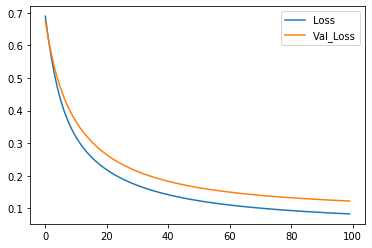

In [6]:
plt.plot(r.history['loss'], label='Loss') #plots the training loss data
plt.plot(r.history['val_loss'], label='Val_Loss') # plots the validation loss data
plt.legend()
plt.show() # shows the graph

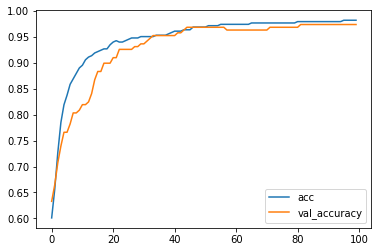

In [7]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()
plt.show()

In [0]:
# Save Model
model.save('classifier.h5')